In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [103]:
from numpy.random import binomial
#probability 0< f <= 0.5
f = 0.5

#number of neurons
N = 30

#Decision boundary (arbitrary and held constant)
T = 5

#Robustness
#Either defined with K, or with rho
"""
K = 0
wAverage = T/(f*N)
# for different rescaled robustness parameters:
rho =K / (wAverage * np.sqrt(f*(1-f)*N))
"""
wAverage = T/(f*N)
rho = 1.
K = rho * wAverage * np.sqrt(f*(1-f)*N)

kappa = K/np.sqrt(N)

p = 2*N

In [56]:
#Code de Vincent : replica-cavity.ipynb
#Changement de notation p -> p_eps

#For defining alpha_c
##The critical capacity is given by alpha_c != 2 = p/N as N tends towards infinity

from scipy.optimize import fsolve
from scipy.stats import norm

#TODO
kappa_tilde = 1.


#1- Get M_tilde via Eq. (22)
def p_eps(eps):
    return f*eps + (1-eps)/2
func = lambda x: np.sum([p_eps(eps) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])
M_tilde_initial_guess = 0.5
M_tilde = fsolve(func, M_tilde_initial_guess)



def G(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

#2- Get tau_eps via Eq. (15)
def tau(eps):
    return -kappa_tilde + eps*f*M_tilde


def H(x):
    return 1 - norm.cdf(x, loc=0, scale=1)

#3- Get B via Eq. (27)
func = lambda x: ((1+x**2)*H(x)-x*G(x))/H(x) - np.sum([(f*eps + (1-eps)/2) * H(eps) for eps in [-1,1]]) / np.sum([(f*eps + (1-eps)/2) * ((1+tau(eps)**2)* H(tau(eps)) - tau(eps)*G(tau(eps))) for eps in [-1,1]])
B_initial_guess = 0.5
B = fsolve(func, B_initial_guess)

alpha_c = H(B) / np.sum([p_eps(eps) * H(tau(eps)) for eps in [-1,1]])


C:\Users\josephxlam\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\josephxlam\Anaconda3\envs\py35\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
alpha_c

In [50]:
np.sum([p_eps(eps) * H(tau(eps)) for eps in [-1,1]])

0.84134474606854293

In [104]:
#number of random patterns
#http://www.cell.com/cms/attachment/572560/4239133/mmc1.pdf
#the choice of alpha_c = H(B)/[f'H(tauMinus) + (1-f')H(tauPlus)]
#Like in Gutfreund and Stein (1990), we suppose f'=f

p = 2*N

def generate_data():
    eta = binomial(1,f,(1,N))
    return(eta)

In [105]:
def testLearn(training_data, w):
    for mu in range(training_data.shape[0]):
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i]
            expected = training_data[mu,i]
            result = dot(x, wi)
            if unit_step(result) != expected:
                return False
    return True

In [ ]:
#Network storing fixed-point attractors

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e6):
            
        mu = random.randint(training_data.shape[0])
        for i in range(training_data.shape[1]):
            x = training_data[mu,np.arange(training_data.shape[1])!=i]
            wi = w[i,np.arange(training_data.shape[1])!=i]
            expected = training_data[mu,i]
            result = dot(wi, x)
            if (2*expected - 1)*(result - T) <= K:
                wi += l_rate * (2*expected - 1) * x
                #Non-negativity constraint
                w[i,np.arange(training_data.shape[1])!=i] = (wi>0) * wi

        converged = testLearn(training_data, w)
        iteration += 1
    if converged:
        print("converged")
        
        training_data = np.vstack((training_data,generate_data()))
    else:
        print("not")
        l_rate /= 2
    print(training_data.shape[0])

converged
2
converged
3
converged
4
converged
5
converged
6
converged
7
converged
8
converged
9
converged
10
converged
11
converged
12


In [89]:
generate_data()

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 1]])

In [ ]:
K*sqrt(N)

K / Wbar 


K * sqrt(N)

In [ ]:
np.save("w.npy", w)
np.save("training_data.npy", training_data)

In [73]:
(1)

0

In [74]:
import numpy as np
w = np.load("w.npy")
training_data = np.load("training_data.npy")

In [64]:
# Network storing sequences

# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random

# Unit_step does not include K, the robustness. 
# A preprocessing step will ignore data too close to the boundary.
unit_step = lambda x: 0 if x < T else 1

#No dummy, because the decision boundary stays in the unit_step function
training_data = generate_data()

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*
for mu in range(training_data.shape[0]-1):
    x = training_data[mu,:]
    for i in range(training_data.shape[1]):
        
        # Only differences with fixed-point attractors
        wi = w[i,:]
        expected = training_data[mu+1,i]
        result = dot(wi, x)
        
        if (2*expected - 1)*(result - T) <= kappa:
            wi += l_rate * (2*expected - 1) * x
            #Non-negativity constraint
            w[i,:] = (wi>0) * wi
            

for mu in range(training_data.shape[0]-1):
    x = training_data[mu,:]
    for i in range(training_data.shape[1]):
        expected = training_data[mu+1,i]
        wi = w[i,:]
        result = dot(x, wi)
        if mu < 1:
            if i < 5:
                print("{}: {} -> {}".format(expected, result, unit_step(result)))

0: 5.25 -> 1
1: 5.9 -> 1
0: 4.99 -> 0
0: 5.83 -> 1
0: 4.09 -> 0


In [65]:
p

1600

## Distribution of synaptic weights

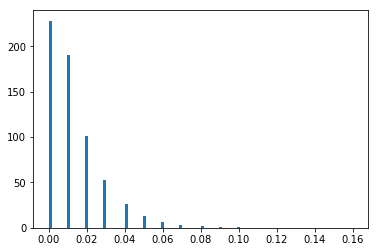

In [69]:
#Figure 2.a
plt.hist(w.flatten(), bins = 100, normed = True)
plt.show()

In [70]:
# Figure 2.b
# distribution synaptic weights (histogram)

print(rho)
connectionProba = (w>0).sum()/(N*N)
print(connectionProba)

1.0
0.634990625


## Statistics of two-neuron bidirectional connectivity

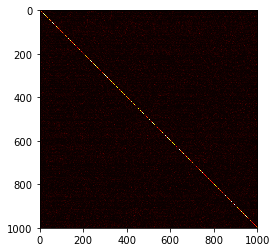

In [5]:
#Figure 3A

#For attractor, the diagonal is apparent
#For the two interpretations, with sequences, we only get random noise


plt.imshow(w, cmap = 'hot')

In [6]:
#Construction of an erdos-renyi network.
#

import networkx

randomGraph = networkx.gnm_random_graph(N, (w>0).sum(), directed = True)


In [ ]:
randomGraph.edges()

In [22]:
randomWeights = np.zeros((N,N))
for coordinate in randomGraph.edges():
    randomWeights[coordinate] = 1.

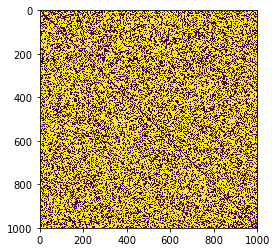

In [21]:
plt.imshow(randomWeights)

In [24]:
#Figure 3b

countReciprocal = (w*w.T>0).sum()
countReciprocalER = (randomWeights*randomWeights.T>0).sum()
print(countReciprocal/countReciprocalER)

1.2338263997


In [30]:
#Figure 4b

#Random symmetric : plot y=x
#Random assymmetric : plot y=x^2

reciprocalProba = countReciprocal/(N*N)
print(reciprocalProba)
print(connectionProba)

0.45009
0.603617


## Degree distributions

In [ ]:
Majorityness = []
for i in range(training_data.shape[1]):
    Majorityness.append(np.sum(training_data[:,i:i+1]*training_data)/(f*N*np.sum(training_data[:,i])))

## Inhibition model

In [ ]:
import numpy as np
x = (training_data[mu,])

In [ ]:
training_data[mu,:]

In [ ]:
x